# Websocket benchmark results analysis

In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Some helper functions

In [2]:
def read_results(path: str) -> pd.DataFrame:
    files = Path(path).glob("**/*.csv")
    data = pd.DataFrame()
    for file in files:
        if file.is_file():
            filename = file.resolve()
            df = pd.read_csv(filename)
            df["folder"] = str(file.parent).split("/")[1]
            name = filename.name.split(".")[0]
            test = name.split("_")[0]
            run = name.split("_")[1]
            df["test"] = test
            df["run"] = run
            data = data.append(df)
    return data

def group_and_aggregate(
        *,
        df: pd.DataFrame,
        by: list,
        aggregate: dict,
        rename: dict = None
) -> pd.DataFrame:
    df = df.groupby(by=by).agg(aggregate)
    df = df.reset_index(drop=False)
    # convert time values from ms to s if we're dealing with original dataframe
    if "time" in df.columns:
        df["time"] = df.apply(lambda row: row["time"]/1000, axis=1)
    if rename is not None:
        df = df.rename(columns=rename)
    return df

def lineplot(
        *,
        df: pd.DataFrame,
        include: list,
        palette: dict,
        x: str,
        y: str,
        hue: str,
        title: str
):
    plt.figure(figsize=(16, 10))
    sns.lineplot(data=df[df["language"].isin(include)], x=x, y=y, hue=hue, palette=palette).set_title(title)

def barplot(
        *,
        df: pd.DataFrame,
        include: list,
        palette: dict,
        x: str,
        y: str,
        hue: str,
        title: str
):
    plt.figure(figsize=(16, 10))
    sns.barplot(data=df[df["language"].isin(include)], x=x, y=y, palette=palette).set_title(title)

In [3]:
palette = {
    "java-websocket": "tomato",
    "nodejs-uws": "mediumseagreen",
    "python-asgi": "gray",
    "python-autobahn": "skyblue",
    "python-uws": "steelblue",
    "python-websockets": "darkorange",
    "rust-websocket": "dimgray"
}

include_python = [
    "python-asgi",
    "python-autobahn",
    "python-uws",
    "python-websockets",
]
include_final = [
    "java-websocket",
    "nodejs-uws",
    "python-uws",
    "python-websockets",
    "rust-websocket"
]

column_names = {
    "clients": "connections",
    "folder": "language",
    "time": "time (s)",
    "longest": "longest (ms)",
    "shortest": "shortest (ms)",
    "average": "average (ms)",
    "connection_time": "connection time (ms)"
}

In [4]:
# Load original results
df_original = read_results("./results")
# df_original

In [5]:
# Group original results so that different test round results are combined
# Let's be pessimistic here and select the worst results
aggregate = {
    "time": "max",
    "longest": "max",
    "shortest": "max",
    "average": "max",
    "connection_time": "max"
}

df_original_grouped = group_and_aggregate(df=df_original, by=["folder", "clients"], aggregate=aggregate, rename=column_names)
# df_original_grouped

# Benchmark results part I


## Request time elapse

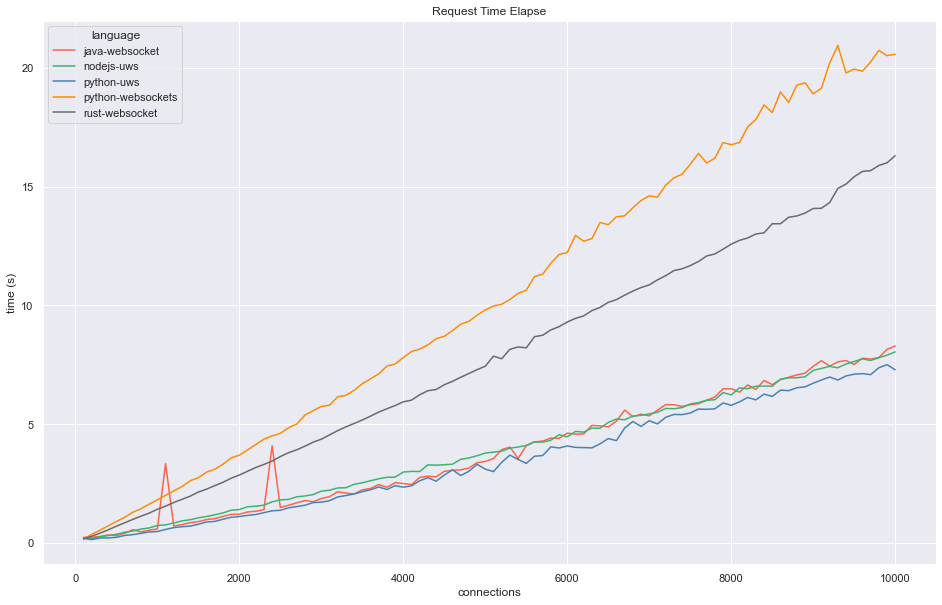

In [6]:
lineplot(df=df_original_grouped, include=include_final, palette=palette, x="connections", y="time (s)", hue="language", title="Request Time Elapse")

## Average response time

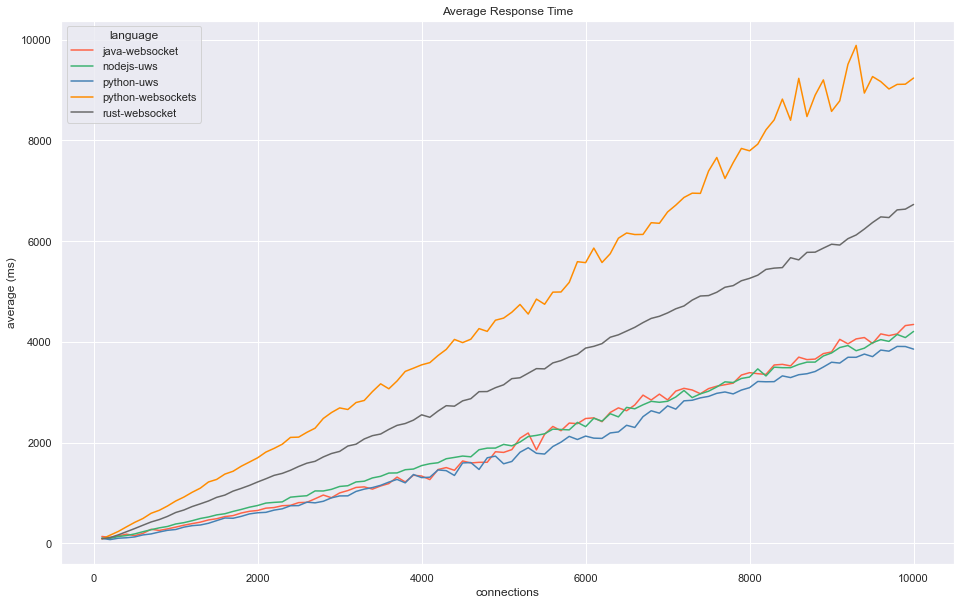

In [7]:
lineplot(df=df_original_grouped, include=include_final, palette=palette, x="connections", y="average (ms)", hue="language", title="Average Response Time")


## Connection time

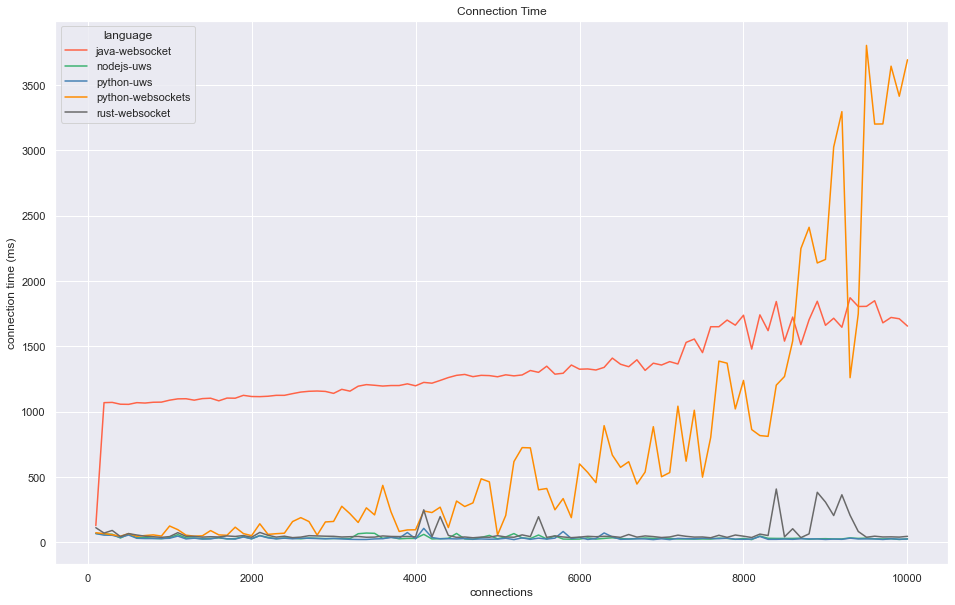

In [8]:
lineplot(df=df_original_grouped, include=include_final, palette=palette, x="connections", y="connection time (ms)", hue="language", title="Connection Time")

## Total duration

In [9]:
aggregate = {
    "time (s)": "sum",
}
df_total_time = group_and_aggregate(df=df_original_grouped, by="language", aggregate=aggregate)
# df_total_time

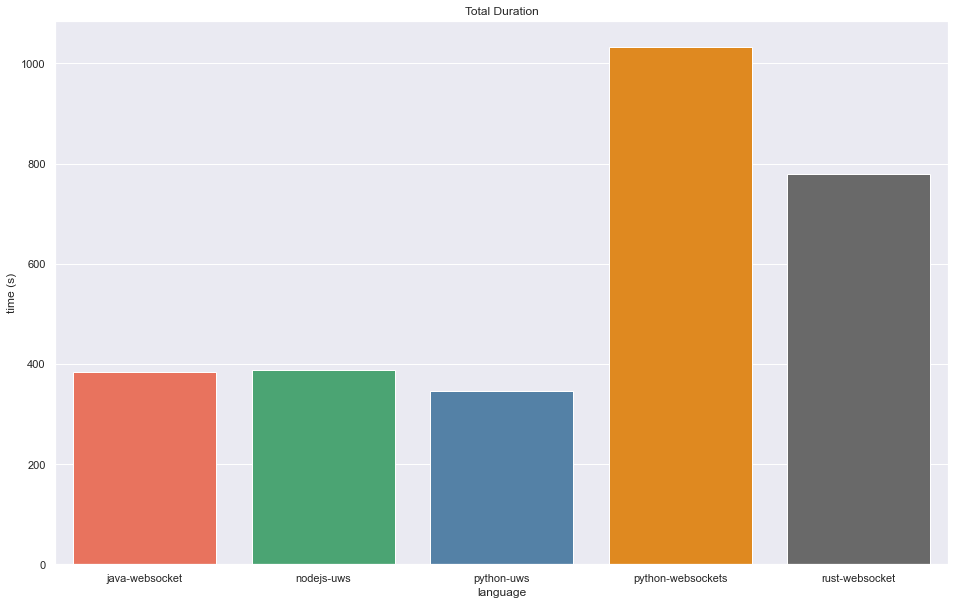

In [10]:
barplot(df=df_total_time, include=include_final, palette=palette, x="language", y="time (s)", hue="language", title="Total Duration")

# Benchmark results part II - Python only

## Request time elapse

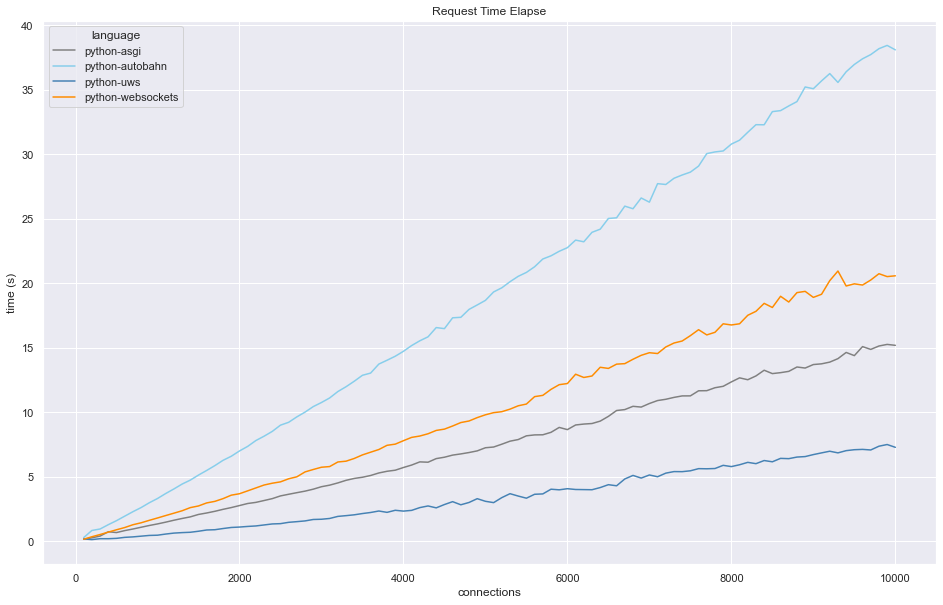

In [11]:
lineplot(df=df_original_grouped, include=include_python, palette=palette, x="connections", y="time (s)", hue="language", title="Request Time Elapse")

## Average response time

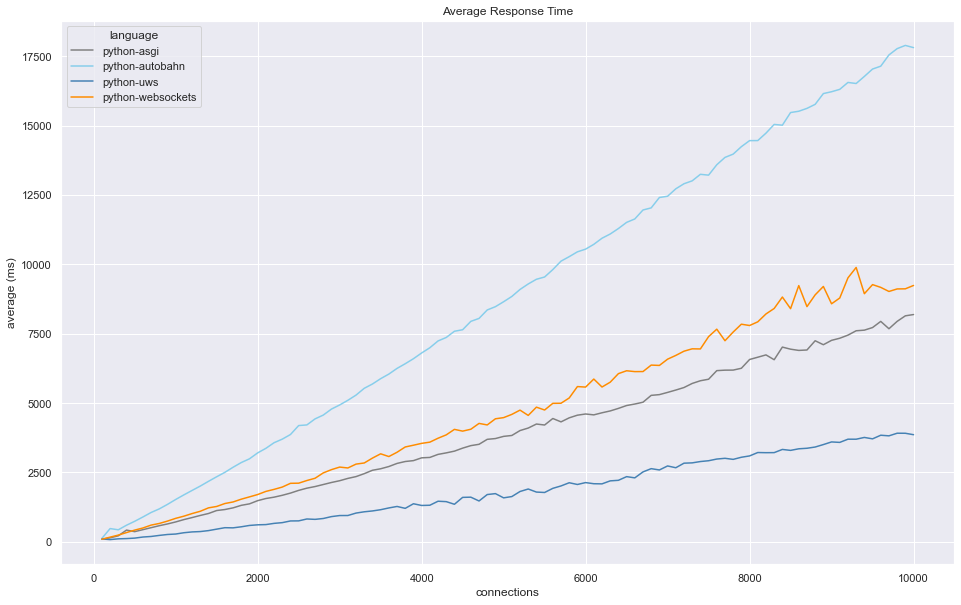

In [12]:
lineplot(df=df_original_grouped, include=include_python, palette=palette, x="connections", y="average (ms)", hue="language", title="Average Response Time")


## Connection time

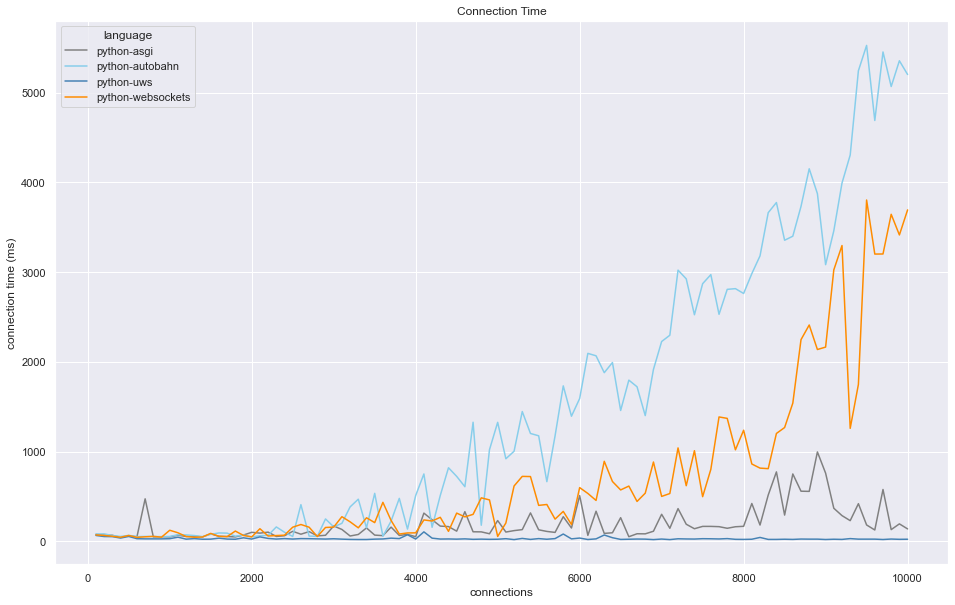

In [13]:
lineplot(df=df_original_grouped, include=include_python, palette=palette, x="connections", y="connection time (ms)", hue="language", title="Connection Time")

## Total duration

In [14]:
aggregate = {
    "time (s)": "sum",
}
df_total_time = group_and_aggregate(df=df_original_grouped, by="language", aggregate=aggregate)
# df_total_time

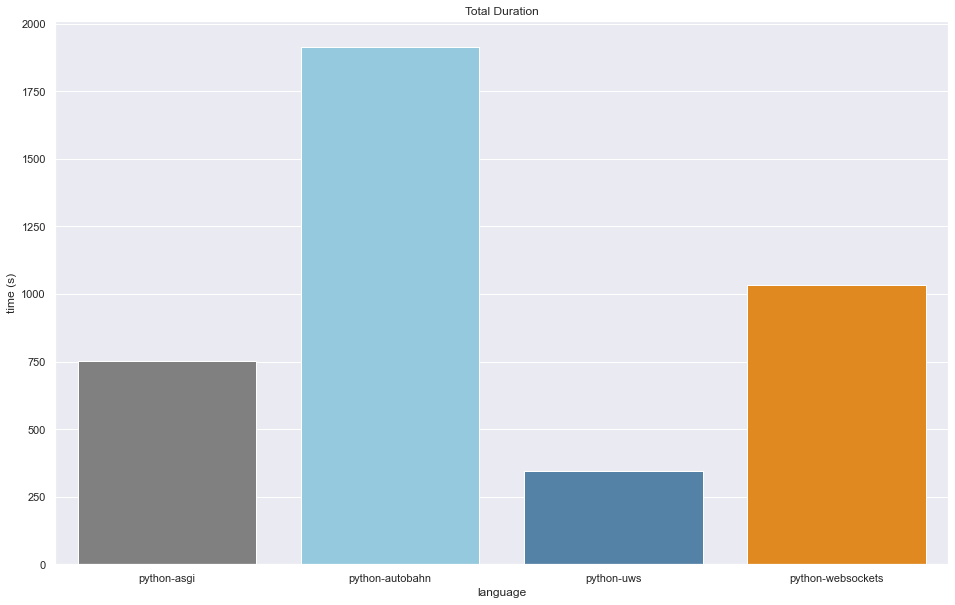

In [15]:
barplot(df=df_total_time, include=include_python, palette=palette, x="language", y="time (s)", hue="language", title="Total Duration")